In [ ]:
import pandas as pd
import chardet

with open('ocorrencias.csv', 'rb') as f:
    result = chardet.detect(f.read())



#Dataset Ocorrencias

In [ ]:
ocorrencias = pd.read_csv("ocorrencias.csv",
                            sep=';',
                            encoding=result['encoding']
                          )
ocorrencias.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2022,janeiro,31
1,Acre,Furto de veículo,2022,janeiro,50
2,Acre,Homicídio doloso,2022,janeiro,10
3,Acre,Lesão corporal seguida de morte,2022,janeiro,1
4,Acre,Roubo a instituição financeira,2022,janeiro,0


In [ ]:
ocorrencias.shape

(23020, 5)

In [ ]:
ocorrencias.columns

Index(['UF', 'Tipo Crime', 'Ano', 'Mês', 'Ocorrências'], dtype='object')

#Dataset IDH Br

In [ ]:
idh_table = pd.read_csv("ipeadata.csv", sep=';')
idh_table.head()

,Sigla,Código,Estado,2015,2016,2017,2018,2019,2020,2021
0,AC,12,Acre,"26,2","26,2","26,4","26,2","26,3","23,5","25,3"
1,AL,27,Alagoas,"26,8","26,9","26,4","27,7","26,1","24,8","25,3"
2,AM,13,Amazonas,"23,7","24,5","24,4","22,7",23,"21,9","22,9"
3,AP,16,Amapá,"24,1",24,"24,1","24,5","22,3","21,9","23,1"
4,BA,29,Bahia,"24,8","25,1",26,"25,8","25,2","23,5","25,6"


In [ ]:
idh_table.shape

(27, 10)

In [ ]:
idh_table.columns

Index(['Sigla', 'Código', 'Estado', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021'],
      dtype='object')

#Indicador crimes SP

In [ ]:
indicador_crimes_sp = pd.read_csv('indicador_municipios_sp.csv', sep=";")
indicador_crimes_sp.head()

,Cód_IBGE,Município,Sigla UF,Região,Mês/Ano,Vítimas
0,3500105,Adamantina,SP,SUDESTE,jan/18,0
1,3500204,Adolfo,SP,SUDESTE,jan/18,0
2,3500303,Aguaí,SP,SUDESTE,jan/18,0
3,3500402,Águas Da Prata,SP,SUDESTE,jan/18,0
4,3500501,Águas De Lindóia,SP,SUDESTE,jan/18,0


In [ ]:
indicador_crimes_sp.shape

(38700, 6)

In [ ]:
indicador_crimes_sp.columns = ['cod_ibge', 'municipio', 'estado', 'regiao', 'mes/ano', 'vitimas']
indicador_crimes_sp.head()

,cod_ibge,municipio,estado,regiao,mes/ano,vitimas
0,3500105,Adamantina,SP,SUDESTE,jan/18,0
1,3500204,Adolfo,SP,SUDESTE,jan/18,0
2,3500303,Aguaí,SP,SUDESTE,jan/18,0
3,3500402,Águas Da Prata,SP,SUDESTE,jan/18,0
4,3500501,Águas De Lindóia,SP,SUDESTE,jan/18,0


#Analisando Vitimas por mês/ano

In [ ]:
media_vitimas_mes_ano = indicador_crimes_sp.groupby('mes/ano').mean().vitimas
media_vitimas_mes_ano.head()

<ipython-input-12-70d5393217fe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_vitimas_mes_ano = indicador_crimes_sp.groupby('mes/ano').mean().vitimas


mes/ano
abr/18    0.389147
abr/19    0.395349
abr/20    0.421705
abr/21    0.355039
abr/22    0.367442
Name: vitimas, dtype: float64

<Axes: ylabel='Frequency'>

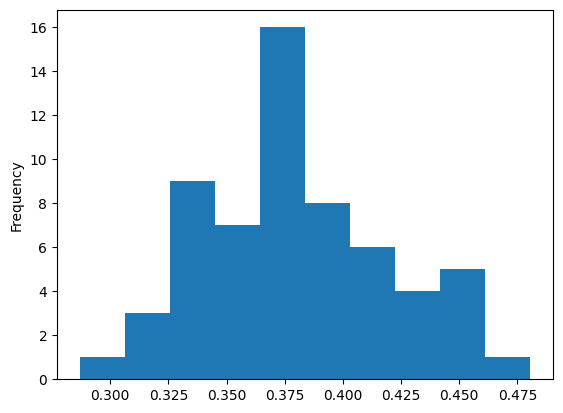

In [ ]:
media_vitimas_mes_ano.plot(kind='hist')

#Analisando Tipificação crimes brasil

In [ ]:
tipificacao_crime = pd.read_csv('tipificacao_crimes_brasil.csv', sep=";")
tipificacao_crime.columns = ['estado', 'tipo_crime', 'ano', 'mes', 'sexo', 'vitimas']
tipificacao_crime.head()

,estado,tipo_crime,ano,mes,sexo,vitimas
0,Acre,Homicídio doloso,2022,janeiro,Feminino,2
1,Acre,Homicídio doloso,2022,janeiro,Masculino,8
2,Acre,Homicídio doloso,2022,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2022,fevereiro,Feminino,0
4,Acre,Homicídio doloso,2022,fevereiro,Masculino,10


In [ ]:
tipificacao_crime.tipo_crime.unique

<bound method Series.unique of 0                           Homicídio doloso
1                           Homicídio doloso
2                           Homicídio doloso
3                           Homicídio doloso
4                           Homicídio doloso
                        ...                 
19743    Roubo seguido de morte (latrocínio)
19744    Roubo seguido de morte (latrocínio)
19745    Roubo seguido de morte (latrocínio)
19746    Roubo seguido de morte (latrocínio)
19747    Roubo seguido de morte (latrocínio)
Name: tipo_crime, Length: 19748, dtype: object>

In [ ]:
frequencia = pd.crosstab(tipificacao_crime.tipo_crime, tipificacao_crime.ano)
frequencia

ano,2015,2016,2017,2018,2019,2020,2021,2022
tipo_crime,,,,,,,,
Homicídio doloso,858,867,897,913,909,913,963,919
Lesão corporal seguida de morte,702,707,728,730,753,729,950,800
Roubo seguido de morte (latrocínio),752,750,773,786,800,778,950,821


In [ ]:
media_vitimas_mes = tipificacao_crime.groupby('mes').mean().vitimas
media_vitimas_mes

<ipython-input-17-d6f95f6b75cb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_vitimas_mes = tipificacao_crime.groupby('mes').mean().vitimas


mes
abril        20.334356
agosto       18.205529
dezembro     20.676108
fevereiro    19.384801
janeiro      21.249698
julho        18.074772
junho        17.869909
maio         19.258182
março        20.499699
novembro     19.654268
outubro      20.321472
setembro     18.681292
Name: vitimas, dtype: float64

<Axes: ylabel='Frequency'>

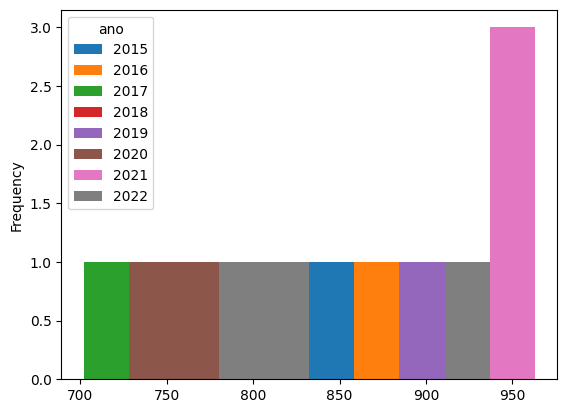

In [ ]:
frequencia.plot(kind='hist')

In [ ]:
indicador_crimes_sp.head()

,cod_ibge,municipio,estado,regiao,mes/ano,vitimas
0,3500105,Adamantina,SP,SUDESTE,jan/18,0
1,3500204,Adolfo,SP,SUDESTE,jan/18,0
2,3500303,Aguaí,SP,SUDESTE,jan/18,0
3,3500402,Águas Da Prata,SP,SUDESTE,jan/18,0
4,3500501,Águas De Lindóia,SP,SUDESTE,jan/18,0


## Analise das 10 cidades com mais vitimas em SP agrupadas nos anos e meses.

In [ ]:
from matplotlib import pyplot as plt

top_10_cidades = indicador_crimes_sp.sort_values(by='vitimas', ascending=False)
top_10_cidades_por_municipios = top_10_cidades.groupby('municipio')

In [ ]:
top_10_cidades = top_10_cidades_por_municipios.head(10)
# top_10_cidades.head(10)

df_agrupado = top_10_cidades.groupby('municipio').agg({'vitimas': 'sum'}).reset_index()
df_agrupado = df_agrupado.sort_values(by='vitimas', ascending=False)
df_agrupado.head()

,municipio,vitimas
572,São Paulo,681
100,Campinas,157
204,Guarulhos,104
548,Sorocaba,81
481,Ribeirão Preto,76


<BarContainer object of 10 artists>

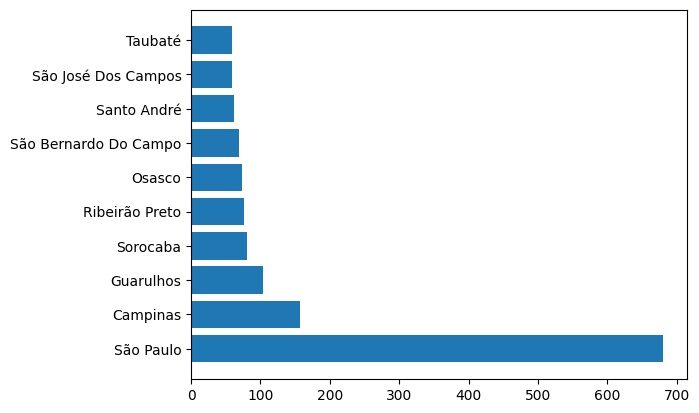

In [ ]:
plt.barh(df_agrupado.head(10).municipio, df_agrupado.head(10).vitimas)

In [43]:
produtividade_policial = pd.read_csv('produtividade_policial_sp_novo.csv', sep=';')
# pd.set_option('display.float_format', '{:.0f}'.format)
produtividade_policial.head()

,Ocorrencia,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,OCORRÊNCIAS DE PORTE DE ENTORPECENTES,973,1043,1217,1054,1015,1007,1035,1116,1091,...,...,...,9551
1,OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES,2806,2822,3069,2652,2897,2803,3044,3024,2624,...,...,...,25741
2,OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES(1),604,560,726,635,679,650,614,661,622,...,...,...,5751
3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,221,294,296,441,325,349,303,306,270,...,...,...,2805
4,Nº DE ARMAS DE FOGO APREENDIDAS,818,923,1032,976,909,962,886,1070,804,...,...,...,8380


In [81]:
trns_prod_policial = produtividade_policial.T.iloc[:, 1:]
trns_prod_policial.head()

,1,2,3,4,5,6,7,8,9,10,11,12
Ocorrencia,OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES,OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES(1),OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,Nº DE ARMAS DE FOGO APREENDIDAS,Nº DE FLAGRANTES LAVRADOS,Nº DE INFRATORES APREENDIDOS EM FLAGRANTE,Nº DE INFRATORES APREENDIDOS POR MANDADO,Nº DE INFRATORES PRESOS EM FLAGRANTE,Nº DE INFRATORES PRESOS POR MANDADO,Nº DE PRISÕES EFETUADAS,Nº DE VEÍCULOS RECUPERADOS,TOT. DE INQUÉRITOS POLICIAIS INSTAURADOS
Jan,2806,604,221,818,7703,644,124,9010,5188,12706,3525,30920
Fev,2822,560,294,923,7552,768,221,9054,5558,13211,3305,30549
Mar,3069,726,296,1032,8409,756,259,9968,6276,14730,4056,34916
Abr,2652,635,441,976,7604,718,170,8854,5587,13082,3709,29510


In [82]:
for column in trns_prod_policial.columns:
    trns_prod_policial[column] = pd.to_numeric(trns_prod_policial[column], errors='coerce')

<Axes: >

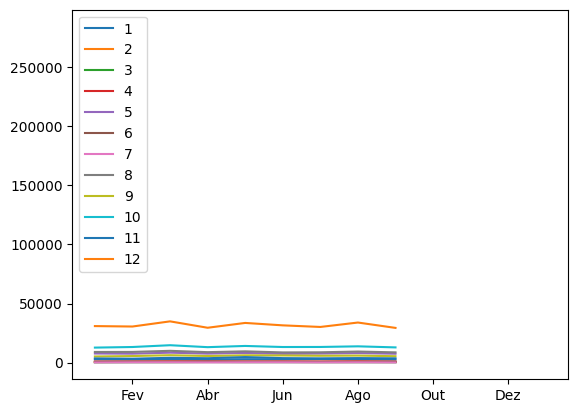

In [109]:
trns_prod_policial.plot()